Author: Hamza Keurti
Module: Algorithms Foundations 2
Lab: 1 - Complexity analysis and Fibonacci numbers.


# Introduction

Problems may be solved through different algorithms, some more time-efficient than others, some more memory-efficient.  
Throughout this module, we will explore different algorithms for some of the most popular computing problems: Sorting, Ordering, and Search.  
In this lab, we will explore notions of complexity through a simple example problem: Computing Fibonacci terms.  

## Fibonacci Numbers  

The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, usually starting with 0 and 1. The sequence looks like this:  

$$
\begin{align*}
F_0 &= 0 \\
F_1 &= 1 \\
F_2 &= F_0 + F_1 = 0 + 1 = 1 \\
F_3 &= F_1 + F_2 = 1 + 1 = 2 \\
F_n &= F_{n-1} + F_{n-2}
\end{align*}
$$  

### Computational Problem:
**Input** : A positive integer `n`  
**Output** : The `n`-th Fibonacci number `F_n`


We will solve this two ways:
1. Using a *recursive* algorithm: A function that calls itself to compute Fibonacci numbers.
2. Using an iterative algorithm: A function that uses loops.

## Recursive Fibonacci
A recursive algorithm is one that calls itself to solve smaller instances of the same problem.
We implement the Fibonacci sequence using its recursive definition:

In [2]:
def fib_recursive(n:int):
    """Calculate Fibonacci number using recursion."""
    if n < 0:
        raise ValueError("Input must be a non-negative integer.")
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_recursive(n - 1) + fib_recursive(n - 2)


Let's verify it works by looking at the first 10 Fibonacci numbers. We should see the sequence:

```python
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
```


In [3]:
[fib_recursive(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Let's try some bigger numbers, like 20 and 30:

In [4]:
fib_recursive(20)

6765

In [5]:
fib_recursive(30)

832040

This was relatively fast, notice though that it took ~0.5 seconds to compute the 30th Fibonacci number.
What about the 36th?

In [6]:
fib_recursive(36)

14930352

10 seconds! Try 50, will it compute in a reasonable time? Should we wait?

In [ ]:
fib_recursive(50)

(*You might want to break the execution, it will take more than an hour.*)

### Measuring time
To measure the time taken by a function, we can use the `time` module in Python.
We create a function "wrapper" that takes a function and its arguments, measures the time taken to execute it, and returns the elapsed time.

Note how functions are objects too in Python, so we can also pass them around as inputs to other functions.


In [8]:
import time

def measure_time(func, *args): # Functions are objects too
    """Measure the time taken by a function to execute."""
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

# try it:
elapsed = measure_time(fib_recursive, 30)
print(f"Time taken to compute fib_recursive(30): {elapsed:.3f} seconds ")

Time taken to compute fib_recursive(30): 0.680 seconds 


To look for the trend, we will compute the time taken for each Fibonacci number from 0 to 39, and plot the results.

In [ ]:
ns = list(range(40))
times_rec = [measure_time(fib_recursive, n) for n in ns]

# We could also use map which takes a function and an iterable, applies the function to each item in the iterable, and returns an iterator that evaluates results.
# times_rec = list(map(lambda n: measure_time(fib_recursive, n), ns))

In [11]:
times_rec[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

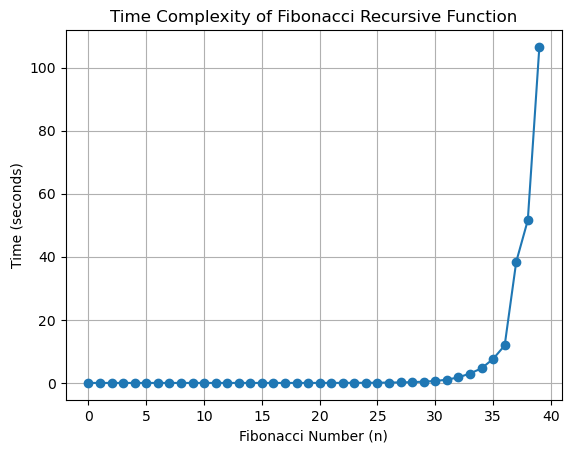

In [12]:
# Plotting the results
import matplotlib.pyplot as plt
plt.plot(ns, times_rec, marker='o')
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Fibonacci Recursive Function')
plt.grid()
plt.show()


Let's plot the log of the time taken for each Fibonacci number, to see if we can find a trend.

C:\Users\hamza\AppData\Local\Temp\ipykernel_12036\1740644984.py:2: RuntimeWarning: divide by zero encountered in log
  log_times_rec = np.log(times_rec)  # Natural log (ln)


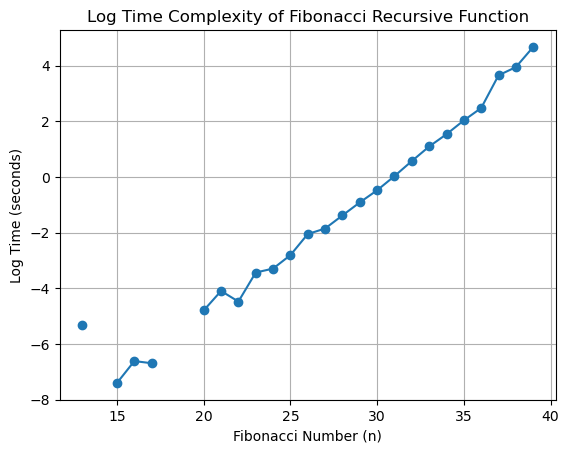

In [13]:
import numpy as np # or math
log_times_rec = np.log(times_rec)  # Natural log (ln)

# Plot:
plt.plot(ns, log_times_rec, marker='o')
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Log Time (seconds)')
plt.title('Log Time Complexity of Fibonacci Recursive Function')
plt.grid()
plt.show()

$$log(t(n)) \approx C*n+ D$$ 

This suggests an exponential growth: $$t(n) = K * a^n = e^D * (e^C)^n$$
for some constants $C$ and $D$.

The constants can be graphically determined by finding $C$ and $D$ from the linear fit of the log time values.

The elapsed time for smaller values of `n` is very small, smaller than the resolution of the timer, which is why it is recorded as 0.0 seconds. How can we fix this?


Exponentials are bad news! Let's try to do better:


## Iterative Fibonacci with memoization
The naive recursive algorithm was wasteful each term was computed multiple times, leading to an exponential time complexity.
We can use memoization to store the results of previously computed Fibonacci numbers, so we don't have to recompute them.

In [63]:
def fib_iterative(n: int) -> int:
    """Calculate Fibonacci number using an iterative approach."""
    if n < 0:
        raise ValueError("Input must be a non-negative integer.")
    fibs = [0, 1] # initial values for fib(0) and fib(1)
    for i in range(2, n + 1):
        fibs.append(fibs[i - 1] + fibs[i - 2])
    return fibs[n]

Checking the first 10 values are correct.
The following should return the first 10 Fibonacci numbers
`[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]`

In [64]:
[fib_iterative(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Let's look for the trend, we will compute the time taken for each Fibonacci number from 0 to 10000, and plot the results.


In [66]:
ns_iter = list(range(10000))
times_iter = list(map(lambda n: measure_time(fib_iterative, n), ns_iter))

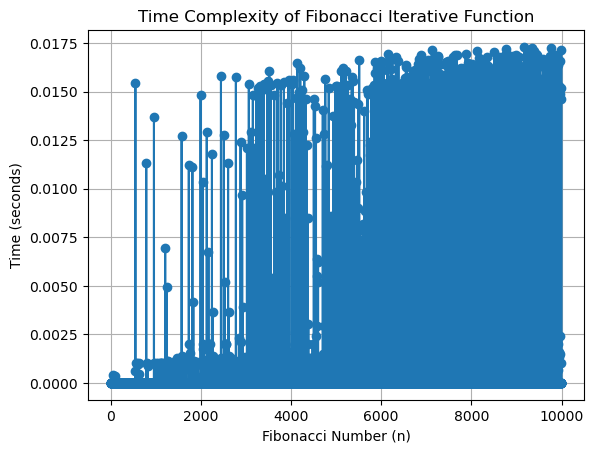

In [67]:
plt.plot(ns_iter, times_iter, marker='o')
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Fibonacci Iterative Function')
plt.grid()
plt.show()


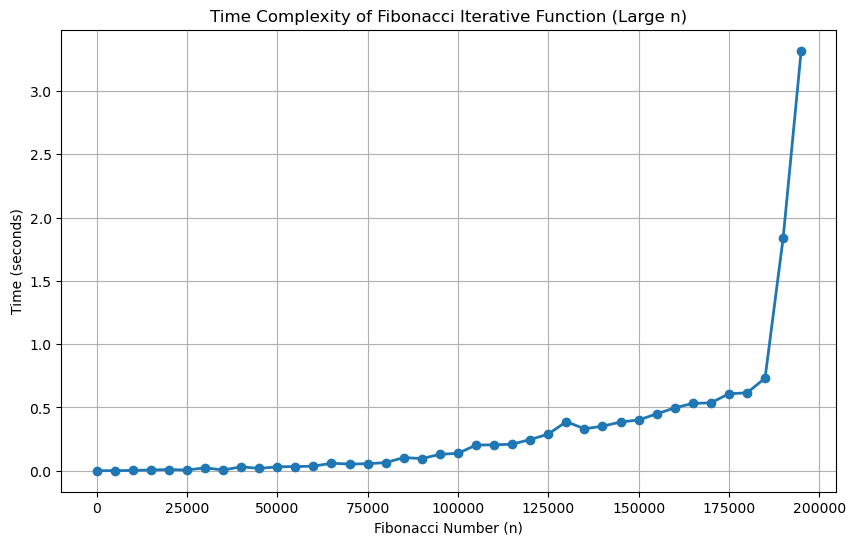

Sample timing results:
fib_iterative(0): 0.000000 seconds
fib_iterative(20,000): 0.009515 seconds
fib_iterative(40,000): 0.030913 seconds
fib_iterative(60,000): 0.035933 seconds
fib_iterative(80,000): 0.064036 seconds
fib_iterative(100,000): 0.137566 seconds
fib_iterative(120,000): 0.245872 seconds
fib_iterative(140,000): 0.351412 seconds
fib_iterative(160,000): 0.496495 seconds
fib_iterative(180,000): 0.615098 seconds


In [93]:
# Try much larger values to see the linear trend
large_ns = list(range(0, 200000, 5000))  # 0, 5000, 10000, ..., 95000
large_times = list(map(lambda n: measure_time(fib_iterative, n), large_ns))

plt.figure(figsize=(10, 6))
plt.plot(large_ns, large_times, marker='o', linewidth=2)
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Fibonacci Iterative Function (Large n)')
plt.grid()
plt.show()

print("Sample timing results:")
for i in range(0, len(large_ns), 4):
    print(f"fib_iterative({large_ns[i]:,}): {large_times[i]:.6f} seconds")

Something happened for bigger values that changed the trend. The culprit is memory usage. As we previously mentioned time complexity is not the only factor to consider when evaluating an algorithm. Memory usage is also important, especially in contexts where we have limited resources, such as embedded systems.
Let's look at the memory usage of the iterative algorithm for larger values of `n`. 
We use the `memory_profiler` package to measure the memory usage of the function.

Peak memory usage for fib_iterative(10000): 227.80 MiB


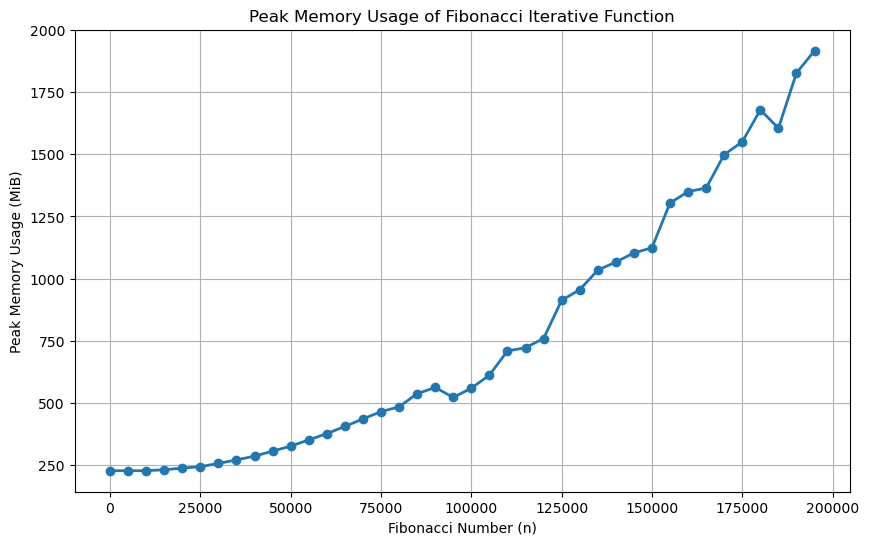

In [95]:
from memory_profiler import memory_usage

def measure_memory(func, *args):
    """Measure the peak memory usage of a function."""
    peak_memory = max(memory_usage((func, args), interval=0.1, retval=False))
    return peak_memory

# Measure memory usage for fib_iterative
n = 10000  # Example input
peak_memory = measure_memory(fib_iterative, n)
print(f"Peak memory usage for fib_iterative({n}): {peak_memory:.2f} MiB")

# Plotting memory usage for larger values of n
large_memory_usage = [measure_memory(fib_iterative, n) for n in large_ns]
plt.figure(figsize=(10, 6))
plt.plot(large_ns, large_memory_usage, marker='o', linewidth=2)
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Peak Memory Usage (MiB)')
plt.title('Peak Memory Usage of Fibonacci Iterative Function')
plt.grid()
plt.show()


This is huge!
The change in growth behavior might be due to a change in how the memory is being managed after we reach a certain threshold.
We need better memoization, more economical. Do we actually need to store all the previous values?
No, we only need the last two values to compute the next one. Let's try that:

## Iterative Fibonacci with more efficient memoization

In [1]:
def fib_iterative_efficient(n):
    if n < 0:
        raise ValueError("Input must be a non-negative integer.")
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    a, b = 0, 1 # initial values, but also f_k, f_k+1 in the loop:
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

In [84]:
# You know the sequence
[fib_iterative_efficient(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [96]:
# Let's measure the time and memory usage for the efficient version
efficient_times = list(map(lambda n: measure_time(fib_iterative_efficient, n), large_ns))
efficient_memory_usage = list(map(lambda n: measure_time(fib_iterative_efficient, n), large_ns))


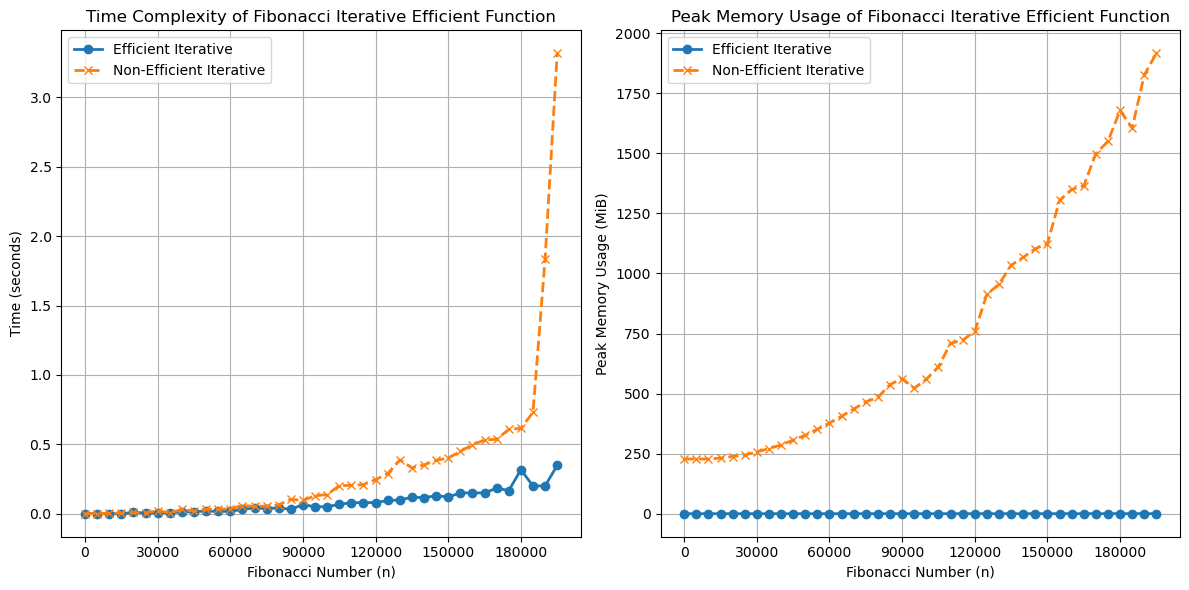

In [101]:
# Plot two figures side by side and compare to the non-efficient version
plt.figure(figsize=(12, 6))

# Time comparison
plt.subplot(1, 2, 1)
plt.plot(large_ns, efficient_times, marker='o', linewidth=2, label='Efficient Iterative')
plt.plot(large_ns, large_times, marker='x', linewidth=2, label='Non-Efficient Iterative', linestyle='--')
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Fibonacci Iterative Efficient Function')
plt.grid()
plt.legend()
plt.xticks(large_ns[::6])  # Show fewer x-ticks (every 6th value)

# Memory usage comparison
plt.subplot(1, 2, 2)
plt.plot(large_ns, efficient_memory_usage, marker='o', linewidth=2, label='Efficient Iterative')
plt.plot(large_ns, large_memory_usage, marker='x', linewidth=2, label='Non-Efficient Iterative', linestyle='--')
plt.legend()
plt.xlabel('Fibonacci Number (n)')
plt.ylabel('Peak Memory Usage (MiB)')
plt.title('Peak Memory Usage of Fibonacci Iterative Efficient Function')
plt.grid()
plt.xticks(large_ns[::6])  # Show fewer x-ticks (every 6th value)

plt.tight_layout()
plt.show()


# Conclusion
There you have it, folks! We have explored different algorithms for computing Fibonacci numbers, from a naive recursive approach to an efficient iterative one with optimized memory usage.
By profiling the time and memory usage of each algorithm, we were able to find the most efficient solution for our problem, with immense gains in speed and memory efficiency.

**Always profile your code!**